## Метод Лакса-Вендроффа

In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

In [37]:
A = -1; B = 1; T = 0.5   # границы
h = 0.05; tau = 0.0025     # размеры шага по времени и координате
M = int ((B-A)/h)# количество узлов по координате
N = int(T / tau)              # количество узлов по времени
u1 = np.linspace(A, B, M+1)
u2 = np.linspace(0,0,M+1)
x = np.linspace(A, B, M+1)
nu = .1

In [38]:
def Gauss(x, mu, sigma):
    return math.exp((-(x-mu)**2)/(2*sigma**2))

In [39]:
mu = 0
sigma = .2

In [40]:
for i in range(M+1):
    u1[i] = Gauss(x[i], mu, sigma)
u0 = u1.copy() 

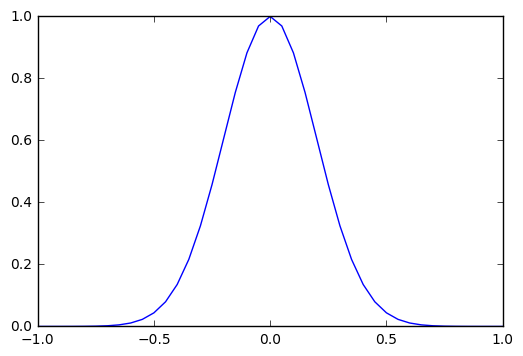

In [41]:
plt.plot(x, u0)

In [42]:
u1[0] = u1[M] = 0

In [43]:
cou1 = np.abs(u1).max() * tau / h
cou2 = nu * tau / h**2
print 'Hyperbolic Courant:', cou1, 'Parabolic Courant:', cou2

Hyperbolic Courant: 0.05 Parabolic Courant: 0.1


In [45]:
for i in range(N):
    for j in range(1, M):
        p1 = ((u1[j]) ** 2 - (u1[j+1]) ** 2) * tau / 4 / h + 0.5 * (u1[j+1] + u1[j])
        p2 = ((u1[j-1]) ** 2 - (u1[j]) ** 2) * tau / 4 / h + 0.5 * (u1[j] + u1[j-1])
        u2[j] = u1[j] + nu*tau / (h ** 2) * (u1[j+1] - 2 * u1[j] + u1[j-1]) - tau / (h * 2) * (p1 ** 2 - p2 ** 2)
    u2, u1 = u1, u2

In [46]:
u1 # при nu = .1

array([ 0.        ,  0.01203233,  0.02420439,  0.03665088,  0.04949668,
        0.0628525 ,  0.07681131,  0.09144536,  0.10680406,  0.12291252,
        0.13977066,  0.15735274,  0.17560704,  0.19445561,  0.21379371,
        0.23348897,  0.25337993,  0.27327404,  0.292945  ,  0.31212957,
        0.33052401,  0.34778072,  0.36350553,  0.37725688,  0.38854813,
        0.39685481,  0.40162889,  0.40232194,  0.39841838,  0.38947836,
        0.37518721,  0.35540459,  0.33020362,  0.29988815,  0.26497903,
        0.22616617,  0.18423366,  0.13997456,  0.09411771,  0.04728649,  0.        ])

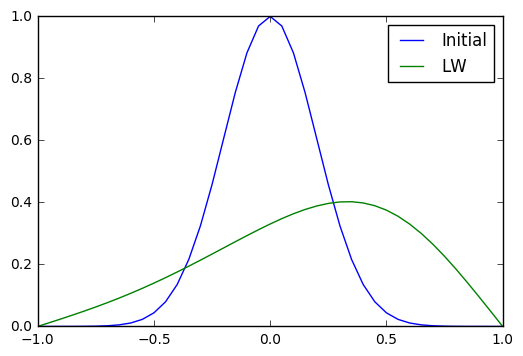

In [47]:
plt.plot(x, u0, label='Initial')
plt.plot(x, u1, label='LW')
plt.legend(loc='best')